In [1]:
import pandas as pd
import altair as alt
import numpy as np

In [25]:
kof_df = pd.read_csv('Datasets/KOF_clean.csv')
dataset_list = ['CAC40-FRA-Clean', 'DAX30-DEU-Clean', 'HangSeng-HKG-Clean', 
    'Nikkei225-JPN-Clean', 'Shanghai-CHN-Clean', 'Nifty50-IND-Clean', 'S&P500-USA-Clean', 'MASI-MAR-Clean',
    'NASI-KEN-Clean', 'FTSE_JSE-ZAF-Clean']

countries_df = pd.DataFrame(columns=['year', 'YoY Change', 'code'])
for df_name in dataset_list:
    df = pd.read_csv('./Datasets/' + df_name + '.csv')
    countries_df = pd.concat([countries_df, df])

kof_df = kof_df.merge(countries_df, on=['year', 'code'])

# Create the lagged Volatility variable
kof_df['volatility_lagged'] = kof_df.groupby(by='code')['volatility'].shift(1)

# Drop the rows with missing values after shifting
kof_df = kof_df.dropna()

In [71]:
alt.Chart(kof_df).mark_point().encode(
    x=alt.X('KOFGI').scale(domain=[25, 95]),
    y='YoY Change:Q',
    color=alt.Color('code:N', title='Country')
).properties(
    title='KOF Globalisation Index vs. YoY Change in Stock Market Index'
)

alt.Chart(...)

In [75]:
alt.Chart(kof_df).mark_point().encode(
    x=alt.X('KOFFiGI').scale(domain=[0, 100]),
    y='YoY Change:Q',
    color='code:N'
).properties(
    title='KOF Financial Globalisation Index vs. YoY Change in Stock Market Index'
)

alt.Chart(...)

<Axes: >

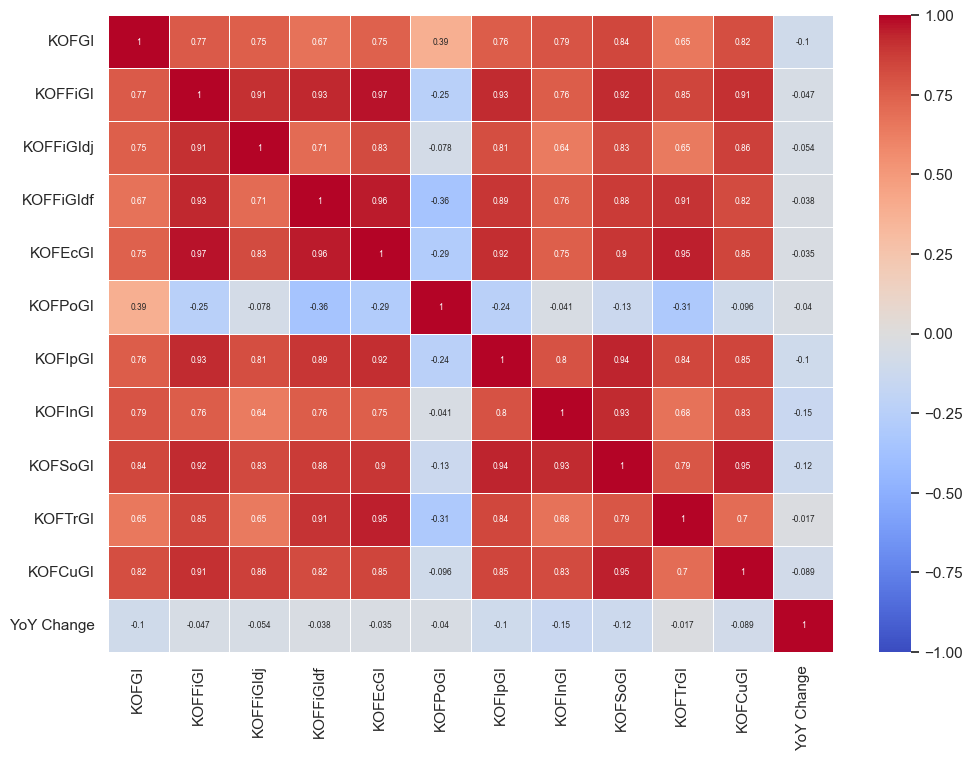

In [83]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = kof_df[['KOFGI', 'KOFFiGI', 'KOFFiGIdj', 'KOFFiGIdf', 'KOFEcGI', 'KOFPoGI', 'KOFIpGI', 'KOFInGI', 'KOFSoGI', 'KOFTrGI', 'KOFCuGI', 'YoY Change']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 6},
            vmin=-1,
            vmax=1)

In [27]:
kof_df.shape

(256, 33)

In [29]:
import pandas as pd
import statsmodels.api as sm

# Regression model with de facto and de jure financial globalization indices and lagged volatility
X = kof_df[['volatility_lagged', 'KOFFiGIdj', 'KOFFiGIdf']]
X = sm.add_constant(X)

# Define the dependent variable
y = kof_df['volatility']

# Fit the regression model
model = sm.OLS(y, X).fit()
# Get the summary of the regression model
model_summary = model.summary()

# Print the regression model summary
print(model_summary)

# Perform hypothesis testing
# Test if the coefficients of Volatility_lagged and KOFFiGI are jointly significantly different from zero
hypotheses = '(KOFFiGIdj = 0)'
f_test_result = model.f_test(hypotheses)

# Print the F-test result
print(f'Test for Hypotheses: {hypotheses}')
print(f'F-test result: {f_test_result}')


                            OLS Regression Results                            
Dep. Variable:             volatility   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     18.98
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           3.96e-11
Time:                        16:45:30   Log-Likelihood:                -886.94
No. Observations:                 256   AIC:                             1782.
Df Residuals:                     252   BIC:                             1796.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0764      2.13

In [31]:
# Regression model with combined financial globalization indices and lagged volatility
X = kof_df[['volatility_lagged', 'KOFFiGI']]
X = sm.add_constant(X)

# Define the dependent variable
y = kof_df['volatility']

# Fit the regression model
model = sm.OLS(y, X).fit()
# Get the summary of the regression model
model_summary = model.summary()

# Print the regression model summary
print(model_summary)

# Perform hypothesis testing
# Test if the coefficients of Volatility_lagged and KOFFiGI are jointly significantly different from zero
hypotheses = '(KOFFiGI = 0)'
f_test_result = model.f_test(hypotheses)

# Print the F-test result
print(f'Test for Hypotheses: {hypotheses}')
print(f'F-test result: {f_test_result}')


                            OLS Regression Results                            
Dep. Variable:             volatility   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     27.76
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.26e-11
Time:                        16:45:45   Log-Likelihood:                -887.61
No. Observations:                 256   AIC:                             1781.
Df Residuals:                     253   BIC:                             1792.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.3955      2.06

In [32]:
test_diff = kof_df.drop(columns=['country', 'YoY Change', 'volatility'], axis=1).groupby(by='code').diff()
test_diff.dropna(inplace=True)
test_diff = test_diff.add_suffix('_diff', axis=1)
test_df = pd.concat([kof_df, test_diff], axis=1)
test_df.dropna(inplace=True)
test_df.columns
diff_df = pd.merge(kof_df, test_diff, left_index=True, right_index=True)

In [10]:
vis = diff_df[['volatility', 'KOFFiGI_diff', 'KOFFiGI', 'year', 'code']]

In [37]:
# Regression model with combined financial globalization YoY difference and lagged volatility
X = diff_df[['volatility_lagged', 'KOFFiGI_diff']]
X = sm.add_constant(X)

# Define the dependent variable

y = diff_df['volatility']

# Fit the regression model
model = sm.OLS(y, X).fit()
# Get the summary of the regression model
model_summary = model.summary()

# Print the regression model summary
print(model_summary)

# Perform hypothesis testing
# Test if the coefficients of Volatility_lagged and KOFFiGI are jointly significantly different from zero
hypotheses = '(KOFFiGI_diff = 0)'
f_test_result = model.f_test(hypotheses)

# Print the F-test result
print(f'Test for Hypotheses: {hypotheses}')
print(f'F-test result: {f_test_result}')

                            OLS Regression Results                            
Dep. Variable:             volatility   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     26.25
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           4.77e-11
Time:                        17:39:01   Log-Likelihood:                -849.13
No. Observations:                 246   AIC:                             1704.
Df Residuals:                     243   BIC:                             1715.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.5426      1.26

In [51]:
alt.Chart(kof_df).mark_point().encode(
    x='KOFFiGI',
    y='volatility:Q',
    color='code:N',
    tooltip=['country']
).properties(
    title='KOF Financial Globalisation Index vs. Volatility'
)

alt.Chart(...)

In [67]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object
scaler = StandardScaler()
kof_df_scaled = kof_df.copy()
kof_df_scaled = kof_df_scaled.drop(columns=['country', 'code'], axis=1)
# Fit the data on the scaler object
kof_df_scaled = pd.DataFrame(scaler.fit_transform(kof_df_scaled), columns=kof_df_scaled.columns)

kof_df_index = kof_df.drop(columns=['country', 'code', 'year', 'YoY Change', 'volatility', 'volatility_lagged'], axis=1)
kof_df_test = pd.DataFrame(scaler.fit_transform(kof_df[['KOFFiGI', 'volatility_lagged']]), 
    columns=['KOFFiGI','volatility_lagged'])
kof_df_fin_scores = kof_df[['YoY Change', 'volatility', 'volatility_lagged', 'KOFFiGI']]

kof_main_indices = kof_df[['KOFFiGI', 'KOFTrGI', 'KOFIpGI', 'KOFInGI', 'KOFCuGI', 'KOFPoGI']]
kof_main_indices_scaled = pd.DataFrame(scaler.fit_transform(kof_main_indices), columns=kof_main_indices.columns)
kof_df_year = kof_df[['year', 'volatility']]

In [61]:
alt.Chart(kof_df_year).mark_point().encode(
    x=alt.X('KOFFiGI').scale(zero=False),
    y=alt.Y('volatility:Q'),
    color='year:N',
    tooltip=['year']
)

alt.Chart(...)

In [65]:
from sklearn.decomposition import PCA


n = 2
pca_fitter = kof_df_year
pca = PCA(n_components=n)

pca.fit(pca_fitter)

columns = [f'PC{i}' for i in range(1, n+1)]
pca_df = pd.DataFrame(pca.transform(pca_fitter), columns=columns)
pca_df = pca_df.shift(1).dropna()
pca_df['code'] = kof_df['code']
# Plot PC1 vs PC2
alt.Chart(pca_df).mark_point().encode(
    x='PC1',
    y='PC2',
    color='code:N',
    tooltip=['code']
)

alt.Chart(...)

In [68]:
# t-SNE Test
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(kof_df_year)

tsne_df = pd.DataFrame(X_tsne, columns=['z1', 'z2']).drop(0)
tsne_df = pd.merge(tsne_df, kof_df[['code']], left_index=True, right_index=True)
alt.Chart(tsne_df).mark_point().encode(
    x='z1',
    y='z2',
    color='code:N',
    tooltip=['code']
)

alt.Chart(...)

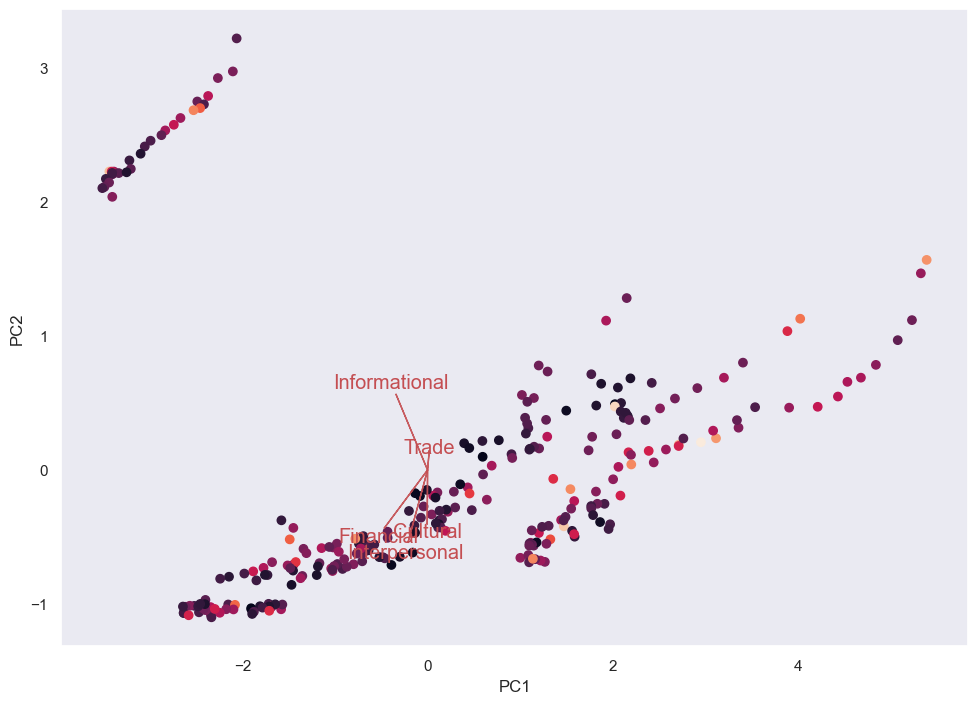

In [18]:
import matplotlib.pyplot as plt
scaled_vol = (kof_df['volatility'] - kof_df['volatility'].mean()) / kof_df['volatility'].std()
y = 
x = kof_main_indices_scaled

# Code to make a biplot
# Pulled from: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot 
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.9)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center', fontsize='large')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(pca.transform(x), pca.components_, labels=['Financial', 'Trade', 'Interpersonal', 'Informational', 'Cultural', 'Political']) 
plt.show()

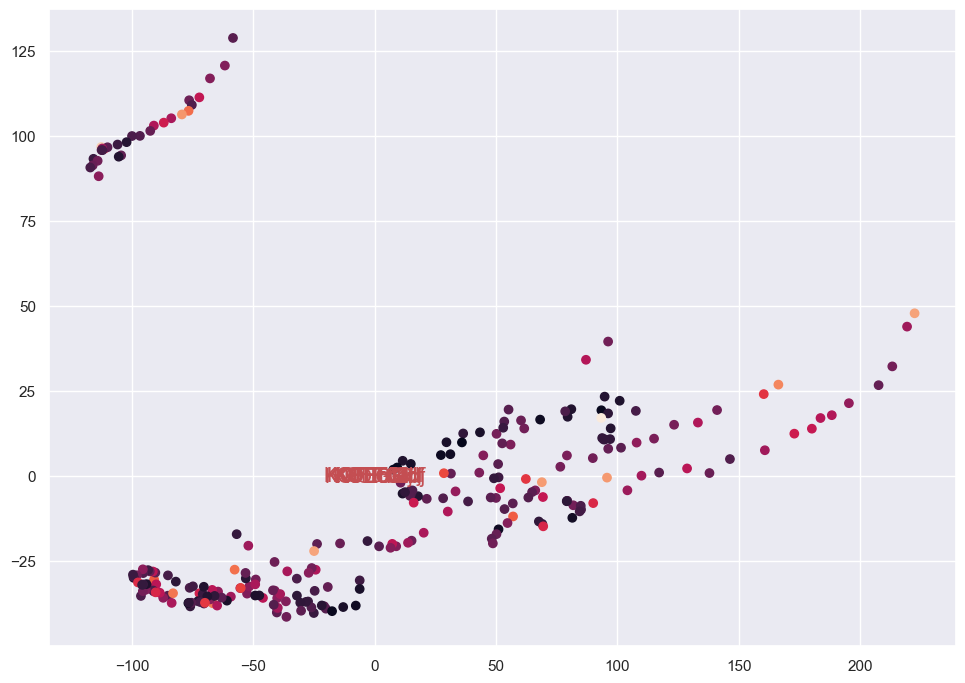

array([0.68893561, 0.18224429, 0.04470761, 0.03632967, 0.01651968,
       0.00924872, 0.00661167, 0.0052964 , 0.00443994, 0.00282131])

In [46]:
# PCA plot with all 27 index variables
x = kof_df.drop(columns=['country', 'code', 'year', 'YoY Change', 'volatility', 'volatility_lagged'], axis=1)
pca = PCA(n_components=10)
pca.fit(x)

y = (kof_df['volatility'] - kof_df['volatility'].mean()) / kof_df['volatility'].std()

myplot(pca.transform(x), pca.components_, labels=x.columns)
plt.show()
pca.explained_variance_ratio_

In [121]:
wb_df = pd.read_csv('Datasets/KOF_World_Bank_merged.csv')
wb_df['pre2008'] = np.where(wb_df['year'] <= 2008, 1, 0)
wb_df = wb_df.sort_values(by=['code', 'year'])
wb_df['pct_change_lagged'] = wb_df.groupby(by='code')['Pct Change'].shift(1)
wb_df = wb_df.dropna()
wb_df = wb_df[wb_df['Pct Change'] <=200]
wb_df['direction_bin'] = np.where(wb_df['Pct Change'] > 0, 1, 0)
wb_df[wb_df['code']=='KAZ']

,Pct Change,year,code,country,KOFGI,KOFGIdf,KOFGIdj,KOFEcGI,KOFEcGIdf,KOFEcGIdj,...,KOFInGIdj,KOFCuGI,KOFCuGIdf,KOFCuGIdj,KOFPoGI,KOFPoGIdf,KOFPoGIdj,pre2008,pct_change_lagged,direction_bin
977,1.532295,2009,KAZ,Kazakhstan,59.0,61.0,57.0,54.0,67.0,41.0,...,56.0,52.0,32.0,71.0,63.0,60.0,65.0,0,-47.032753,1
1057,-0.969609,2010,KAZ,Kazakhstan,59.0,61.0,58.0,52.0,64.0,40.0,...,61.0,53.0,32.0,73.0,64.0,61.0,67.0,0,1.532295,0
1138,-36.402759,2011,KAZ,Kazakhstan,59.0,60.0,58.0,49.0,59.0,39.0,...,65.0,54.0,36.0,73.0,64.0,62.0,67.0,0,-0.969609,0
1219,-12.682085,2012,KAZ,Kazakhstan,61.0,62.0,60.0,51.0,61.0,41.0,...,67.0,53.0,35.0,72.0,66.0,63.0,69.0,0,-36.402759,0
1300,-22.511704,2013,KAZ,Kazakhstan,57.0,55.0,59.0,48.0,57.0,38.0,...,69.0,53.0,35.0,71.0,58.0,46.0,69.0,0,-12.682085,0
1381,-15.984983,2014,KAZ,Kazakhstan,60.0,61.0,59.0,49.0,59.0,39.0,...,72.0,53.0,36.0,70.0,66.0,63.0,69.0,0,-22.511704,0
1462,-47.635525,2015,KAZ,Kazakhstan,61.0,60.0,62.0,48.0,54.0,42.0,...,77.0,51.0,32.0,70.0,68.0,64.0,73.0,0,-15.984983,0
1543,29.601296,2016,KAZ,Kazakhstan,63.0,64.0,63.0,53.0,62.0,44.0,...,77.0,59.0,48.0,70.0,69.0,64.0,74.0,0,-47.635525,1
1624,80.253696,2017,KAZ,Kazakhstan,63.0,63.0,63.0,52.0,60.0,45.0,...,78.0,59.0,47.0,72.0,70.0,65.0,74.0,0,29.601296,1
1705,-38.286761,2018,KAZ,Kazakhstan,64.0,64.0,63.0,52.0,61.0,43.0,...,78.0,60.0,49.0,71.0,71.0,67.0,74.0,0,80.253696,0


In [95]:
from scipy.stats import ttest_ind

# Test if the mean of the pre-2008 and post-2008 periods are significantly different
pre2008 = wb_df[wb_df['pre2008'] == 1]['Pct Change']
post2008 = wb_df[wb_df['pre2008'] == 0]['Pct Change']
print(f'Pre-2008 mean: {pre2008.mean()}')
print(f'Post-2008 mean: {post2008.mean()}')
res = ttest_ind(pre2008, post2008)
print(f'T statistic: {res.statistic}', f'P-value: {res.pvalue}')


Pre-2008 mean: 12.670294078627311
Post-2008 mean: 5.872498348813102
T statistic: 4.268765216907873 P-value: 2.0668766779627236e-05


In [158]:
alt.Chart(wb_df).mark_circle().encode(
    x=alt.X('KOFGI').scale(zero=False),
    y='Pct Change:Q',
    tooltip=['country']
).properties(
    title='KOF Globalisation Index vs. YoY Change in Stock Market Index'
)

alt.Chart(...)

In [140]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(wb_df.drop(columns=['country', 'code', 'year', 'Pct Change']))

tsne_df = pd.DataFrame(X_tsne, columns=['z1', 'z2', 'z3']).drop(0)
tsne_df = pd.merge(tsne_df, wb_df[['code']], left_index=True, right_index=True)
tsne_df['direction_bin'] = wb_df['direction_bin']


In [1]:
alt.Chart(tsne_df).mark_circle().encode(
    x='z1',
    y='z3',
    color='direction_bin:N',
    tooltip=['code']
)
wb_df['year'].describe()

NameError: name 'alt' is not defined

In [143]:
from umap import UMAP

umap = UMAP(n_components=3)
X_umap = umap.fit_transform(wb_df.drop(columns=['country', 'code', 'year', 'Pct Change']))

umap_df = pd.DataFrame(X_umap, columns=['z1', 'z2', 'z3']).drop(0)
umap_df = pd.merge(umap_df, wb_df[['code']], left_index=True, right_index=True)
umap_df['direction_bin'] = wb_df['direction_bin']

In [147]:
alt.Chart(umap_df).mark_circle().encode(
    x='z1',
    y='z2',
    color='direction_bin:N',
    tooltip=['code']
).interactive(0)

alt.Chart(...)

In [119]:
wb_df[(wb_df['country'] == 'Kazakhstan')]

,Pct Change,year,code,country,KOFGI,KOFGIdf,KOFGIdj,KOFEcGI,KOFEcGIdf,KOFEcGIdj,...,KOFInGIdj,KOFCuGI,KOFCuGIdf,KOFCuGIdj,KOFPoGI,KOFPoGIdf,KOFPoGIdj,pre2008,pct_change_lagged,direction_bin
977,1.532295,2009,KAZ,Kazakhstan,59.0,61.0,57.0,54.0,67.0,41.0,...,56.0,52.0,32.0,71.0,63.0,60.0,65.0,0,-47.032753,1
1057,-0.969609,2010,KAZ,Kazakhstan,59.0,61.0,58.0,52.0,64.0,40.0,...,61.0,53.0,32.0,73.0,64.0,61.0,67.0,0,1.532295,0
1138,-36.402759,2011,KAZ,Kazakhstan,59.0,60.0,58.0,49.0,59.0,39.0,...,65.0,54.0,36.0,73.0,64.0,62.0,67.0,0,-0.969609,0
1219,-12.682085,2012,KAZ,Kazakhstan,61.0,62.0,60.0,51.0,61.0,41.0,...,67.0,53.0,35.0,72.0,66.0,63.0,69.0,0,-36.402759,0
1300,-22.511704,2013,KAZ,Kazakhstan,57.0,55.0,59.0,48.0,57.0,38.0,...,69.0,53.0,35.0,71.0,58.0,46.0,69.0,0,-12.682085,0
1381,-15.984983,2014,KAZ,Kazakhstan,60.0,61.0,59.0,49.0,59.0,39.0,...,72.0,53.0,36.0,70.0,66.0,63.0,69.0,0,-22.511704,0
1462,-47.635525,2015,KAZ,Kazakhstan,61.0,60.0,62.0,48.0,54.0,42.0,...,77.0,51.0,32.0,70.0,68.0,64.0,73.0,0,-15.984983,0
1543,29.601296,2016,KAZ,Kazakhstan,63.0,64.0,63.0,53.0,62.0,44.0,...,77.0,59.0,48.0,70.0,69.0,64.0,74.0,0,-47.635525,1
1624,80.253696,2017,KAZ,Kazakhstan,63.0,63.0,63.0,52.0,60.0,45.0,...,78.0,59.0,47.0,72.0,70.0,65.0,74.0,0,29.601296,1
1705,-38.286761,2018,KAZ,Kazakhstan,64.0,64.0,63.0,52.0,61.0,43.0,...,78.0,60.0,49.0,71.0,71.0,67.0,74.0,0,80.253696,0


In [126]:
model_df = wb_df
#encode 1 as positive change, 0 as negative change
model_df['direction_bin'] = np.where(model_df['Pct Change'] > 0, 1, 0)
US_direction_bin = model_df[model_df['code'] == 'USA'].groupby(by='year')['direction_bin'].first()
model_df['US_pct_change'] = wb_df['year'].map(wb_df[wb_df['code'] == 'USA'].groupby(by='year')['Pct Change'].first())
test_df = model_df[['year', 'code', 'KOFFiGIdj', 'KOFFiGIdf', 'Pct Change', 'pre2008', 'US_pct_change', 'direction_bin']]

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X = test_df[test_df['code'] != 'USA'].drop(['code', 'year', 'Pct Change', 'direction_bin', 'pre2008'], axis=1)
y = test_df[test_df['code'] != 'USA']['direction_bin'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

mlp = MLPClassifier(hidden_layer_sizes=(100, 80, 50), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 80, 50), max_iter=1000)

In [156]:
from sklearn.metrics import confusion_matrix
print(f'Accuracy: {mlp.score(X_test, y_test)}')

conf_matrix = confusion_matrix(y_test, mlp.predict(X_test))
conf_matrix

Accuracy: 0.6824512534818942


array([[ 94,  56],
       [ 58, 151]])

In [159]:
from sklearn.model_selection import GridSearchCV


param_grid = {'hidden_layer_sizes': [(100, 100, 80, 50), (100, 80, 50), (100, 50), (100), (80, 50), (50)]}

nn_grid = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, refit=True, verbose=3)
nn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.698 total time=   3.0s
[CV 2/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.742 total time=   3.7s
[CV 3/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.711 total time=   2.0s
[CV 4/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.718 total time=   4.8s


/Users/andrew/anaconda3/envs/dsl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 5/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.725 total time=   2.3s
[CV 1/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.729 total time=   2.7s
[CV 2/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.746 total time=   3.8s
[CV 3/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.742 total time=   2.4s
[CV 4/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.704 total time=   2.2s
[CV 5/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.690 total time=   1.9s
[CV 1/5] END ......hidden_layer_sizes=(100, 50);, score=0.722 total time=   3.5s
[CV 2/5] END ......hidden_layer_sizes=(100, 50);, score=0.735 total time=   2.0s
[CV 3/5] END ......hidden_layer_sizes=(100, 50);, score=0.725 total time=   1.4s
[CV 4/5] END ......hidden_layer_sizes=(100, 50);, score=0.659 total time=   0.9s
[CV 5/5] END ......hidden_layer_sizes=(100, 50);, score=0.697 total time=   1.1s
[CV 1/5] END ............hidden_layer_sizes=100;, score=0.722 total time=   0.8s
[CV 2/5] END ............

GridSearchCV(estimator=MLPClassifier(max_iter=10000),
             param_grid={'hidden_layer_sizes': [(100, 100, 80, 50),
                                                (100, 80, 50), (100, 50), 100,
                                                (80, 50), 50]},
             verbose=3)

In [161]:
len(wb_df['country'].unique())

83